# Differentiation by First Principles (A Programmer's Perspective)

If you have taken a course in differential calculus or taken A-Level mathematics, you have likely come across the term "Differentiation by First Principles". If not, you may still recognize the following formula:

$$
\frac{f(x+h) - f(x)}{h}
$$

But what does this mean, and what even is differentiation?

## What is differentiation?
Differentiation is a method used by mathematicians to calculate the _gradient_ of a function. For a linear (straight) line, you can do this by simply dividing the change in y by the change in x:
$$
\text{gradient} = \frac{change in y}{change in x}
$$

Often "change in" can be shortened to $\Delta$ (The Greek capital delta):
$$
\text{gradient} = \frac{\Delta y}{\Delta x}
$$

Straight lines are often written in the form:
$$
y = mx + c
$$

The following code will create a straight line, and we will show how to find its gradient:


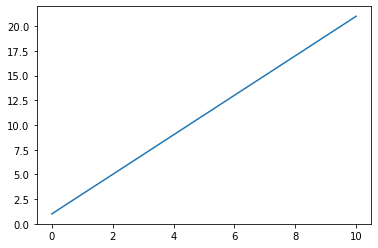

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from typing import Union


def straightline_function(m: Union[float, int], c: Union[float, int],
                          xvalues: list[Union[float, int]]) -> list[float]:
    """
    Takes the values m and c from an equation in the form $y = mx + c$
    Applies the function to a list of x values
    """
    return [m * xvalue + c for xvalue in xvalues]


# create a list of 100 equally spaced numbers between 0 and 10
xvalues = np.linspace(0, 10, 100)
m = 2
c = 1
yvalues = straightline_function(m, c, xvalues)
plt.plot(xvalues, yvalues)
plt.show()

As you should be able to see from this graph, every 1 you go along the x-axis, you go 2 up the y-axis. This can be confirmed using the formula $\text{gradient} = \frac{\Delta y}{\Delta x}$ because let's look at the full range of x-values 0-10. So $\Delta x$ = 10 and $\Delta y = 20$. Therefore: $\frac{20}{10} = 2$.

But what if our function isn't a straight line. How can we find the gradient? Let's plot and have a look at the function $x^2$

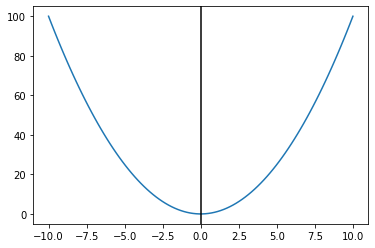

In [2]:
from typing import Callable


def xsquared(x: Union[int, float]) -> Union[int, float]:
    """
    Function of y = x^2
    """
    return x**2


def function_to_xvalues(
        function: Callable[[Union[int, float]], Union[int, float]],
        xvalues: list[Union[float, int]]) -> list[Union[int, float]]:
    """
    Takes a list of xvalues and applies a function to it
    
    Returns: y-values
    """
    return [function(xvalue) for xvalue in xvalues]


xvalues = np.linspace(-10, 10, 100)
yvalues = function_to_xvalues(xsquared, xvalues)
plt.plot(xvalues, yvalues)
plt.axvline(x = 0, color = 'black', label = 'axis at x=0')
plt.show()

Let's start by using our previous formula for finding the gradient of a straight line and try and use it between 0 and 10. So, we have one point at (0, 0) and one point at (10, 100). Using the formula for gradient:
$$
\frac{100 - 0}{10 - 0} = 10
$$
Let's plot this straight line we used as an estimate onto the graph:

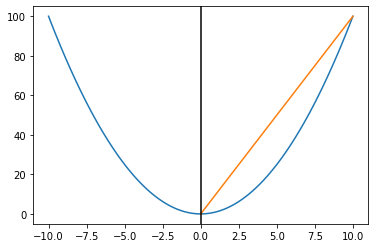

In [3]:
xvalues = np.linspace(-10, 10, 100)
yvalues = function_to_xvalues(xsquared, xvalues)
plt.plot(xvalues, yvalues)
plt.plot(np.linspace(0, 10, 100),
         straightline_function(10, 0, np.linspace(0, 10, 100)))
plt.axvline(x=0, color='black', label='axis at x=0')
plt.show()

This doesn't look like a very good approximation at all... It doesn't really fit with the gradient of this graph at all... So, what can we do? I mean, the line we just created, what even was it an approximation of? 

A key thing you need to understand is that for non-linear graphs, the gradient is constantly changing. Therefore, at x = 0, the gradient is going to be different from that at x = 10. You should be able to see this on the graph, as the x-values increase, the graph seems to get much steeper. 

Let's try and find the gradient at x = 0. What we could try to do is try different values to test between. So, instead of testing between (0, 0) and (10, 100) why not between (0, 0) and (8, 64) or (7, 49). Let's animate it!

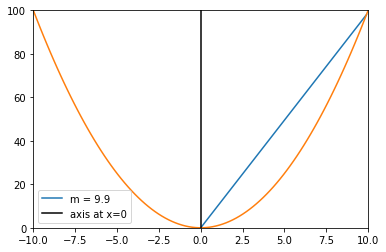

In [4]:
from matplotlib.animation import FuncAnimation
from IPython import display

fig = plt.figure()
lines_plotted = plt.plot([])
line_plotted = lines_plotted[0]

plt.xlim(-10, 10)
plt.ylim(0, 100)

xvalues = np.linspace(-10, 10, 100)
yvalues = function_to_xvalues(xsquared, xvalues)
plt.plot(xvalues, yvalues)
plt.axvline(x=0, color='black', label='axis at x=0')

TOTAL_FRAMES = 99

legend = plt.legend()


def AnimationFunction(frame, legend):
    percentage = 1 - (frame + 1) / (TOTAL_FRAMES + 1)
    tox = percentage * 10
    xrange = np.linspace(0, tox, 100)
    gradient = (tox**2) / tox
    y = straightline_function(gradient, 0, xrange)
    line_plotted.set_data((xrange, y))
    line_plotted.set_label(f"m = {round(gradient, 1)}")
    legend.remove()
    legend = plt.legend()


anim_created = FuncAnimation(
    fig,
    lambda frame, l=legend: AnimationFunction(frame, l),
    frames=TOTAL_FRAMES,
    interval=1000)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)

If you look at the value of m (the blue line legend) you should be able to see that it is slowly approaching 0. What we can say is that as the distance between the two points we choose for $\frac{\Delta y}{\Delta x}$ gets smaller and smaller. The gradient approaches 0. Therefore the gradient at x = 0, is 0. 

Now let's return back to the first principles formula:
$$
\frac{f(x+h) - f(x)}{h}
$$

The full version of this formula is actually:
$$
\lim_{h\to 0}  \frac{f(x+h) - f(x)}{h}
$$

What is "h" though? $h$ is actually the distance from the x value you want to know the gradient of. So in our animation above, at the time T = 0, the $h$ value is 10. Because we are 10 values away from $ x = 0 $. As we approached x = 0, our line slowly approached h = 0. 

Let's now look at this mathematically. We have the function: $f(x) = x^2$ and we want to know the gradient at the point $x = 0$. Let's write out our formula for first principles once again:
$$
\lim_{h\to 0}  \frac{f(x+h) - f(x)}{h}
$$
Now let's substitute the value x = 0:
$$
\lim_{h\to 0}  \frac{f(0+h) - f(0)}{h}
$$
What is $f(0)$?  $0$
What is $f(h)$? $h^2$:
$$
\lim_{h\to 0}  \frac{h^2}{h}
$$
Therefore we can simplify the fraction:
$$
\lim_{h\to 0}  h
$$
So, as h approaches 0, the value of the gradient is h. Therefore, the gradient at x = 0 is 0.